In [302]:
import numpy as np
import torch
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

import mesher, spin_system, utils, particles, res_field_algorithm, spectra_manager, constants
from importlib import reload
reload(mesher)
reload(spin_system)
reload(utils)
reload(particles)
reload(res_field_algorithm)
reload(spectra_manager)
reload(constants)

<module 'constants' from 'D:\\ITC\\РНФ_Курганский_2024\\pythonProject\\constants.py'>

In [303]:
mesh = mesher.DelaunayMesh()
rotation_matrices = mesh.create_rotation_matrices()

In [304]:
interpolation_grid = torch.tensor([[val[0], val[1]] for val in mesh.interpolation_grid])
areas = mesh.spherical_triangle_areas(interpolation_grid, mesh.final_simplices)

tensor(6.2835)


In [305]:
ham_strained = torch.tensor([[1.1, 1.1, 1.3], [1.2, 1.3, 1.2]])

In [306]:
components = torch.tensor([[1.1, 1.1, 1.3], [1.2, 1.3, 1.2]])
frame = torch.tensor([[1.1, 1.1, 1.3], [1.2, 1.3, 1.2]])
#strain = torch.tensor([[1.1, 1.1, 1.3], [1.2, 1.3, 1.2]])

some_interaction_1 = spin_system.Interaction(components, frame, None)
some_interaction_2 = spin_system.Interaction(components, frame, None)

In [307]:
components = torch.tensor([2.3, 2.31, 2.05])
frame = torch.tensor([0, 0, 0.0])
strain = torch.tensor([0.2, 0.1, 0.2])

some_interaction_1 = spin_system.Interaction(components, frame, strain / 10000)
some_interaction_2 = spin_system.Interaction(components * 3e2, frame, strain / 100000)

In [308]:
electron = particles.Electron(spin=1 / 2)
g_isotropic = some_interaction_1
nucleus = particles.Nucleus("14N")
A = some_interaction_2
electrons = [electron]
nuclei = [nucleus]
humiltonian_strained = torch.tensor([1.1, 2.2, 3.3]) / 10000

In [309]:
system = spin_system.SpinSystem(electrons=electrons, nuclei=nuclei, g_tensors=[g_isotropic], hyperfine_interactions=[(0, 0, A)])

In [310]:
def iterate_and_print_shape(gen):
    for value in gen:
        print(value.shape)

In [311]:
iterate_and_print_shape(system.build_field_dep_stained())

torch.Size([6, 6])
torch.Size([6, 6])
torch.Size([6, 6])


In [312]:
powder = spin_system.MultiOrientedSystem(system, humiltonian_strained, rotation_matrices)

In [313]:
iterate_and_print_shape(powder.spin_system.build_field_dep_stained())

torch.Size([469, 6, 6])
torch.Size([469, 6, 6])
torch.Size([469, 6, 6])


In [314]:
powder.get_hamiltonian_terms()[0].shape

torch.Size([469, 6, 6])

In [315]:
powder.calculate_derivative_max().shape

torch.Size([469, 1, 1])

In [316]:
for i in powder.build_field_dep_stained():
    print(i.shape)

torch.Size([469, 6, 6])
torch.Size([469, 6, 6])
torch.Size([469, 6, 6])


In [317]:
resonator = res_field_algorithm.ResField()
F, Gx, Gy, Gz = powder.get_hamiltonian_terms()
resonance_frequency = torch.tensor([9.8 * 1e9])

In [318]:
B_low = torch.tensor([0.0]).expand(56)
B_high = torch.tensor([1000]).expand(56)

In [319]:
v = torch.tensor(0.0)
v.unsqueeze(-1)

tensor([0.])

In [320]:
batches = resonator(powder, resonance_frequency, B_low, B_high, F, Gz)

RuntimeError: The size of tensor a (469) must match the size of tensor b (56) at non-singleton dimension 0

In [321]:
mesh.size

torch.Size([469])

In [322]:
spectra_creator = spectra_manager.SpectraCreator(6, (469, ), mesh)

In [323]:
fields_1 = torch.linspace(0.290, 0.36, 3000)
answer = spectra_creator(powder, resonance_frequency, fields_1)

tensor(6.2831)


In [324]:
answer

tensor([ 0.0366, -0.1216,  0.0324,  ...,  0.4837,  0.5241,  0.0493])

In [325]:
import matplotlib.pyplot as plt

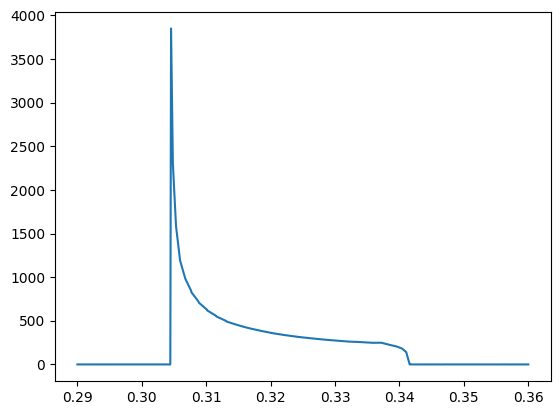

In [326]:
plt.plot(fields_1.numpy(), answer.numpy())

In [275]:
import numpy as np
import torch
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

import mesher, spin_system, utils, particles, res_field_algorithm, spectra_manager, constants
from importlib import reload
reload(mesher)
reload(spin_system)
reload(utils)
reload(particles)
reload(res_field_algorithm)
reload(spectra_manager)
reload(constants)

<module 'constants' from 'D:\\ITC\\РНФ_Курганский_2024\\pythonProject\\constants.py'>

In [276]:
mesh_size = (56,)
fields = torch.linspace(0.10, 0.45, 1000)
B_low = fields[..., 0].unsqueeze(-1).expand(*mesh_size)
B_high = fields[..., -1].unsqueeze(-1).expand(*mesh_size)

In [706]:
def print_answers():
    mesh_size = (56,)
    fields = torch.linspace(0.30, 0.33, 2000)
    B_low = fields[..., 0].unsqueeze(-1).expand(*mesh_size)
    B_high = fields[..., -1].unsqueeze(-1).expand(*mesh_size)
    F, Gx, Gy, Gz = powder.get_hamiltonian_terms()
    bathces = res_field_algorithm.ResField()(powder, resonance_frequency, B_low, B_high, F, Gz)
    (vectors_u, vectors_v), (valid_lvl_down, valid_lvl_up), B_trans, mask_trans, mask_triu, indexes, resonance_energies = bathces[0]
    
    fields = torch.linspace(0.31, 0.33, 2000)
    B_low = fields[..., 0].unsqueeze(-1).expand(*mesh_size)
    B_high = fields[..., -1].unsqueeze(-1).expand(*mesh_size)
    F, Gx, Gy, Gz = powder.get_hamiltonian_terms()
    bathces = res_field_algorithm.ResField()(powder, resonance_frequency, B_low, B_high, F, Gz)
    (vectors_u_2, vectors_v_2), (valid_lvl_down_2, valid_lvl_up_2), B_trans_2, mask_trans_2, mask_triu_2, indexes_2, resonance_energies_2 = bathces[0]

    #print(f"B_trans \n: {1 - B_trans / B_trans_2}")
    #print(f"mask_triu \n: {mask_triu}, {mask_triu_2}")
    #print(f"energies \n: {1 - resonance_energies / resonance_energies_2}")
    print(B_trans)
    #delta = (1 - ((vectors_u + 1e-22) / (vectors_u_2 + 1e-22)).abs())
    delta = (vectors_u  - vectors_u_2)
    max_u = vectors_u.abs().max(dim=(-1))[0] + vectors_u_2.abs().max(dim=(-1))[0]
    res = (delta / max_u[..., None]).abs()
    mask = (res >0.6).any(dim=(0, 2))
    print(res[:, 3, :] > 0.6)
    print(f"vectors_u \n: {delta[5, 3, :]}")
    print(f"vectors_u \n: {vectors_u_2[5, 3, :]}")
    print(f"vectors_u \n: {vectors_u[5, 3, :]}")

In [ ]:
print_answers()

In [703]:
mesh_size = (56,)
fields = torch.linspace(0.10, 0.45, 1000)
B_low = fields[..., 0].unsqueeze(-1).expand(*mesh_size)
B_high = fields[..., -1].unsqueeze(-1).expand(*mesh_size)
print_answers(B_low, B_high)

TypeError: print_answers() takes 0 positional arguments but 2 were given

In [ ]:
mesh_size = (56,)
fields = torch.linspace(0.30, 0.40, 1000)
B_low = fields[..., 0].unsqueeze(-1).expand(*mesh_size)
B_high = fields[..., -1].unsqueeze(-1).expand(*mesh_size)
print_answers(B_low, B_high)

In [1219]:
fields_1 = torch.linspace(0.305, 0.70, 2000)

In [1408]:
components = torch.tensor([2.05, 2.05, 2.3])
resonance_frequency = torch.tensor([9.8 * 1e9])
g_perp = 2.3
g_parall = 2.05
factor_1 = (1/4) * (constants.BOHR * g_perp ** 2 / (constants.PLANCK * resonance_frequency * (g_perp - g_parall))) ** 0.5
factor_2 = 1 / (fields_1 - constants.PLANCK * resonance_frequency / (g_perp * constants.BOHR )) ** 0.5

In [1409]:
answer = factor_1 * factor_2

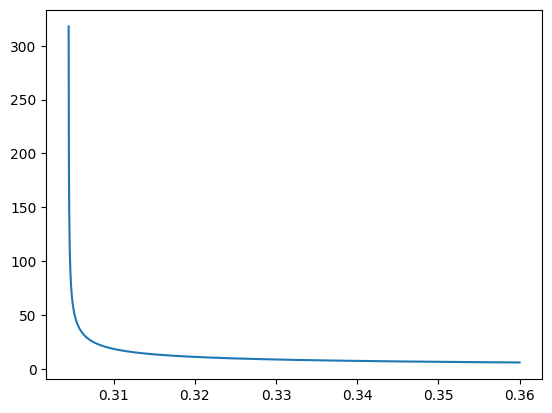

In [1410]:
plt.plot(fields_1.numpy(), answer.numpy())

In [1223]:
answer

tensor([57.5373, 49.5878, 44.2242,  ...,  2.1862,  2.1857,  2.1851])